# Pandas
### Alberto Torres Barrán

Pandas es una librería de código abierto que implementa estructuras y herramientas para el análisis de datos en Python. Más concretamente, las dos estructuras principales son:
  * `Series`, para representar un vector de datos con un índice (no necesariamente numérico) asociado
  * `DataFrame`, para representar datos tabulares, donde las columnas pueden ser de distinto tipo y tienen asociado otro índice

Referencia: http://pandas.pydata.org/    
Tutoriales: https://pandas.pydata.org/pandas-docs/stable/tutorials.html    
Documentación: https://pandas.pydata.org/pandas-docs/stable/index.html

In [1]:
d = [
    [6,"apple",4491], 
    [2,"pineapple",5017], 
    [4,"watermelon",5747], 
    [7,"apple",5017],
    [1,"apple",5017],
    [1,"Avocado",5017],
    [1,"Bilberry",4491],
    [1,"apple",2683],
    [3,"apple",3683],
    [6,"apple",2441]
]

In [28]:
d5 = pd.Series([4.5, 6.7, 8.9])
d6 = pd.Series([3.2, 8.3, 9.9])

In [31]:
(d5 - d6).abs().idxmin()

2

In [36]:
df1 = pd.read_csv("../../data/comptagevelo2017.csv")
df2 = pd.read_csv("../../data/localisationcompteursvelo2015.csv", encoding="latin1")

In [43]:
df1

,Date,Unnamed: 1,Berri1,Boyer,Boyer 2,Brébeuf,Christophe-Colomb,CSC (Côte Sainte-Catherine),Eco-Totem - Métro Laurier,Maisonneuve_2,...,Notre-Dame,Parc,PierDup,Pont Jacques-Cartier,Rachel / Hôtel de Ville,Rachel / Papineau,René-Lévesque,Saint-Antoine,Saint-Laurent/Bellechasse,Saint-Urbain
0,01/01/2017,00:00,38,35,NaN,20,NaN,60,58,38,...,10,13,9,0.0,42,77,15,8,72,5
1,02/01/2017,00:00,109,40,0.0,43,NaN,61,66,152,...,9,52,14,0.0,136,231,22,10,182,4
2,03/01/2017,00:00,141,24,24.0,9,NaN,14,131,216,...,32,71,17,0.0,99,242,53,28,532,5
3,04/01/2017,00:00,233,64,95.0,7,NaN,12,160,284,...,45,64,5,15.0,128,296,131,33,821,0
4,05/01/2017,00:00,265,93,94.0,11,NaN,14,160,306,...,38,97,6,0.0,189,338,89,45,786,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,27/12/2017,00:00,116,95,54.0,6,7.0,55,112,143,...,0,47,3,1.0,93,154,75,14,143,7
361,28/12/2017,00:00,137,112,51.0,21,3.0,32,108,123,...,0,31,4,3.0,72,138,26,11,123,21
362,29/12/2017,00:00,124,61,53.0,18,8.0,17,229,112,...,0,28,2,8.0,87,127,30,6,130,54
363,30/12/2017,00:00,80,69,44.0,3,10.0,23,91,57,...,0,21,3,1.0,92,122,19,5,85,13


In [44]:
bikes = (
    df1.drop(columns="Unnamed: 1")
       .melt(id_vars=["Date"], var_name="barrio", value_name="n_personas")
)

In [53]:
bikes.to_csv("bikes_long.csv", index=False)

In [47]:
total_2017 = bikes.groupby("barrio")["n_personas"].sum().reset_index()
total_2017

,barrio,n_personas
0,Berri1,924499.0
1,Boyer,635273.0
2,Boyer 2,470098.0
3,Brébeuf,786729.0
4,CSC (Côte Sainte-Catherine),449665.0
5,Christophe-Colomb,204327.0
6,Eco-Totem - Métro Laurier,596706.0
7,Maisonneuve_2,862718.0
8,Maisonneuve_3,361726.0
9,Notre-Dame,354063.0


In [50]:
df2.merge(total_2017, how="inner", left_on="nom_comptage", right_on="barrio")

,id,nom,nom_comptage,Etat,Type,Annee_implante,coord_X,coord_Y,barrio,n_personas
0,1,St-Urbain_1,Saint-Urbain,Existant,compteur,2014,-73.588882,45.519549,Saint-Urbain,371084.0
1,2,Brebeuf_1,Brébeuf,Existant,compteur,2009,-73.573984,45.527411,Brébeuf,786729.0
2,5,Maisonneuve_2,Maisonneuve_2,Existant,compteur,2008,-73.575078,45.500544,Maisonneuve_2,862718.0
3,10,Jacques-Cartier_1,Pont Jacques-Cartier,Existant,compteur,2011,-73.554576,45.525601,Pont Jacques-Cartier,271545.0
4,12,Pierre-Dupuy_1,PierDup,Existant,compteur,2010,-73.544546,45.499662,PierDup,309569.0
5,14,St-Antoine_1,Saint-Antoine,Existant,compteur,2013,-73.557787,45.506247,Saint-Antoine,106950.0
6,17,Maisonneuve_3,Maisonneuve_3,Existant,compteur,2013,-73.585229,45.490563,Maisonneuve_3,361726.0
7,19,Piste_Notre-Dame,Notre-Dame,Existant,compteur,2013,-73.544038,45.531402,Notre-Dame,354063.0
8,22,Parc_1,Parc,Existant,compteur,2010,-73.581714,45.513462,Parc,593997.0
9,29,Boyer_1,Boyer,Existant,compteur,2013,-73.605235,45.538402,Boyer,635273.0


In [2]:
import pandas as pd

df = pd.DataFrame(d, columns=["ref", "fruit", "euro"])

In [6]:
d1 = df.groupby(['ref','fruit'])['euro'].sum().reset_index()


In [19]:
d1

,ref,fruit,euro
0,1,Avocado,5017
1,1,Bilberry,4491
2,1,apple,7700
3,2,pineapple,5017
4,3,apple,3683
5,4,watermelon,5747
6,6,apple,6932
7,7,apple,5017


In [22]:
d3 = d1.pivot(index="ref", columns="fruit", values="euro").fillna(value=0)

In [17]:
d3["tag"] = d3.idxmax(axis=1) #argmax

In [20]:
pd.__version__

'1.4.2'

In [18]:
d3

fruit,Avocado,Bilberry,apple,pineapple,watermelon,tag
ref,,,,,,
1,5017.0,4491.0,7700.0,0.0,0.0,apple
2,0.0,0.0,0.0,5017.0,0.0,pineapple
3,0.0,0.0,3683.0,0.0,0.0,apple
4,0.0,0.0,0.0,0.0,5747.0,watermelon
6,0.0,0.0,6932.0,0.0,0.0,apple
7,0.0,0.0,5017.0,0.0,0.0,apple


In [4]:
ru=list(set(i[0] for i in d))
fu=list(set(i[1] for i in d))
head=[i for i in fu]
head.insert(0,'ref')
head.append('tag')
d2 = pd.DataFrame(columns=head, index=ru).fillna(0).reset_index()


In [5]:
d2

,index,ref,apple,Avocado,watermelon,pineapple,Bilberry,tag
0,1,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0
4,6,0,0,0,0,0,0,0
5,7,0,0,0,0,0,0,0


In [6]:
import pandas as pd 

pd.__version__

'1.4.2'

In [2]:
a = [1, 2, 3, 4, 5, 6]
b = [6, 7, 8, 9, 0, 2]

for i in range(len(a)):
    print(a[i] + b[i])

7
9
11
13
5
8


In [3]:
import numpy as np
import pandas as pd

# las Series contienen un array de Numpy con un índice asociado
serie = pd.Series([1, 2, 3, 4, 5])
serie

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [2]:
# podemos acceder al array de Numpy que contiene los datos
serie.values

array([1, 2, 3, 4, 5])

In [3]:
# y al indice
serie.index

RangeIndex(start=0, stop=5, step=1)

In [4]:
# podemos acceder a ciertos valores de la Serie como si fuera un array de Numpy de 1D
serie[2:4]

2    3
3    4
dtype: int64

In [5]:
# la gran ventaja es que el indice no tiene por que ser numerico, pueden ser fechas...
rango = pd.date_range('1/7/2017', periods=24, freq='H')
ts = pd.Series(np.random.randn(len(rango)), index=rango)
ts

2017-01-07 00:00:00   -0.134443
2017-01-07 01:00:00    0.725232
2017-01-07 02:00:00    0.051823
2017-01-07 03:00:00    2.482787
2017-01-07 04:00:00    1.770811
2017-01-07 05:00:00   -0.370798
2017-01-07 06:00:00   -0.299877
2017-01-07 07:00:00    0.566310
2017-01-07 08:00:00    0.696561
2017-01-07 09:00:00    0.101779
2017-01-07 10:00:00    1.991917
2017-01-07 11:00:00    0.200513
2017-01-07 12:00:00   -0.251107
2017-01-07 13:00:00   -0.618972
2017-01-07 14:00:00    0.845987
2017-01-07 15:00:00   -1.338207
2017-01-07 16:00:00   -0.340135
2017-01-07 17:00:00    0.511225
2017-01-07 18:00:00    1.006686
2017-01-07 19:00:00    1.896409
2017-01-07 20:00:00   -0.221662
2017-01-07 21:00:00   -0.781553
2017-01-07 22:00:00    0.437079
2017-01-07 23:00:00   -1.317655
Freq: H, dtype: float64

In [8]:
# o cadenas de caracteres
notas = pd.Series([4.5, 9.8, 6.5], index=['Alberto', 'Maria', 'Jose'])
notas

Alberto    4.5
Maria      9.8
Jose       6.5
dtype: float64

In [11]:
notas * 10

Alberto    45.0
Maria      98.0
Jose       65.0
dtype: float64

In [7]:
notas['Maria']

9.8

In [8]:
# en este caso, es similar a un diccionario pero sus elementos estan ordenados
notas['Alberto':'Maria']

Alberto    4.5
Maria      9.8
dtype: float64

Los `DataFrames` almacenan datos tabulares y se pueden interpretar de dos formas:
 * Como un array de Numpy en 2D donde cada columna puede ser de un tipo distinto y tiene un nombre
 * Como un conjunto de `Series` que comparten un índice

In [15]:
import pandas as pd
fechas = pd.date_range('20170101', periods=6)
fechas

DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05', '2017-01-06'],
              dtype='datetime64[ns]', freq='D')

In [16]:
np.random.randn(6,4)

array([[-1.01471621, -1.59582871, -1.49573264,  0.1730212 ],
       [-0.28614367,  0.58063026,  2.46825955,  0.83231296],
       [-1.22999916,  0.06256386,  0.20643307,  0.69180953],
       [ 0.67276411, -0.17510358,  1.05525639, -1.22025753],
       [-1.42061833,  1.42978709,  1.27138726, -0.8228005 ],
       [-1.55492545,  0.52205246,  0.60845294, -1.38928705]])

In [17]:
list('ABCD')

['A', 'B', 'C', 'D']

In [19]:
# se puede crear un DataFrame a partir de un array de Numpy, indicando el indice a usar (fechas en este caso)
# y el nombre de las columnas
# ['A', 'B', 'C', 'D']
import pandas as pd
import numpy as np
df = pd.DataFrame(np.random.randn(6,4), index=fechas, columns=list('ABCD'))
df

,A,B,C,D
2017-01-01,0.558840,-2.438923,-0.377027,-0.451371
2017-01-02,0.805073,0.122558,0.506302,0.727108
2017-01-03,0.189866,0.127957,-0.954937,1.399899
2017-01-04,0.068143,2.276783,0.775801,-0.644611
2017-01-05,-1.446648,-0.866752,-0.163753,1.160175
2017-01-06,-1.532577,0.206124,1.177768,-0.794853


In [21]:
# tambien se puede crear un DataFrame a partir de un diccionario con objetos que se pueden convertir en Series
df2 = pd.DataFrame({ 
    'A' : 1.,
    'B' : pd.Timestamp('20130102'),
    'C' : pd.Series([1, 2, 3, 4], index=list(range(4)),dtype='float32'),
    'D' : np.array([3] * 4,dtype='int32'),
    'E' : pd.Categorical(["test","train","test","train"]),
    'F' : 'foo'
})
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,2.0,3,train,foo
2,1.0,2013-01-02,3.0,3,test,foo
3,1.0,2013-01-02,4.0,3,train,foo


In [22]:
# tipos de cada una de las columnas
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

In [13]:
# nombres de las columnas
df2.columns

Index(['A', 'B', 'C', 'D', 'E', 'F'], dtype='object')

In [30]:
# podemos acceder a cada una de las columnas por su nombre, devolviendo una Serie
df2['F']

0    foo
1    foo
2    foo
3    foo
Name: F, dtype: object

In [4]:
# tambien a varias, obteniendo otro DataFrame
df[ ['A', 'D'] ]

,A,D
2017-01-01,0.992322,-0.908263
2017-01-02,0.692115,1.000005
2017-01-03,-0.400034,1.658187
2017-01-04,0.432123,-0.798281
2017-01-05,1.296294,-1.184458
2017-01-06,-0.081185,-0.641098


In [34]:
cols = ["A", "D", "B"]
df[cols]

,A,D,B
2017-01-01,0.558840,-0.451371,-2.438923
2017-01-02,0.805073,0.727108,0.122558
2017-01-03,0.189866,1.399899,0.127957
2017-01-04,0.068143,-0.644611,2.276783
2017-01-05,-1.446648,1.160175,-0.866752
2017-01-06,-1.532577,-0.794853,0.206124


In [35]:
df

,A,B,C,D
2017-01-01,0.558840,-2.438923,-0.377027,-0.451371
2017-01-02,0.805073,0.122558,0.506302,0.727108
2017-01-03,0.189866,0.127957,-0.954937,1.399899
2017-01-04,0.068143,2.276783,0.775801,-0.644611
2017-01-05,-1.446648,-0.866752,-0.163753,1.160175
2017-01-06,-1.532577,0.206124,1.177768,-0.794853


In [36]:
df.index

DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05', '2017-01-06'],
              dtype='datetime64[ns]', freq='D')

In [37]:
df3 = df.reset_index()

In [40]:
df3["index"]

0   2017-01-01
1   2017-01-02
2   2017-01-03
3   2017-01-04
4   2017-01-05
5   2017-01-06
Name: index, dtype: datetime64[ns]

In [16]:
# tambien podemos acceder a un subconjunto de las filas
df[1:4]

,A,B,C,D
2017-01-02,-0.513089,-0.109069,1.542913,-0.825571
2017-01-03,0.607591,-0.199361,-0.328072,-0.561886
2017-01-04,0.744946,0.104076,0.114213,0.499643


In [17]:
# y combinar ambas cosas
df['A'][1:4]

2017-01-02   -0.513089
2017-01-03    0.607591
2017-01-04    0.744946
Freq: D, Name: A, dtype: float64

Pandas también tiene otros métodos de acceso más avanzados:
  * *Indexing and Selecting Data* http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing    
  * *Multiindexing/Advanced indexing* http://pandas.pydata.org/pandas-docs/stable/advanced.html#advanced

##### Selección por etiquetas

Método `.loc`. Algunos ejemplos:

In [49]:
# en este caso, los puntos finales SI se incluyen
df.iloc[0][['A','B']]

A    0.558840
B   -2.438923
Name: 2017-01-01 00:00:00, dtype: float64

In [19]:
df.loc['20170103']

A    0.607591
B   -0.199361
C   -0.328072
D   -0.561886
Name: 2017-01-03 00:00:00, dtype: float64

In [53]:
df.iloc[[1], [0, 3]]

,A,D
2017-01-02,0.805073,0.727108


In [71]:
df.shape[1]

4

###### Selección por posición

Método `.iloc`. Muy parecido a como lo hace Numpy. Algunos ejemplos:

In [20]:
# cuarta fila
df.iloc[3]

A    0.744946
B    0.104076
C    0.114213
D    0.499643
Name: 2017-01-04 00:00:00, dtype: float64

In [21]:
print((df.iloc[3:5,0:2]))
df.values[3:5, 0:2]

                   A         B
2017-01-04  0.744946  0.104076
2017-01-05 -1.279198 -0.438748


array([[ 0.74494575,  0.10407614],
       [-1.27919791, -0.43874757]])

In [22]:
df.iloc[[1,2,4],[0,2]]

,A,C
2017-01-02,-0.513089,1.542913
2017-01-03,0.607591,-0.328072
2017-01-05,-1.279198,1.746576


##### Operaciones

Funcionalidad básica: https://pandas.pydata.org/pandas-docs/stable/basics.html

In [72]:
df

,A,B,C,D
2017-01-01,0.558840,-2.438923,-0.377027,-0.451371
2017-01-02,0.805073,0.122558,0.506302,0.727108
2017-01-03,0.189866,0.127957,-0.954937,1.399899
2017-01-04,0.068143,2.276783,0.775801,-0.644611
2017-01-05,-1.446648,-0.866752,-0.163753,1.160175
2017-01-06,-1.532577,0.206124,1.177768,-0.794853


In [73]:
df["F"] = 0

In [80]:
df["G"] = [1, 2, 3, 4, 5, 6]
df

,A,B,C,D,F,G
2017-01-01,0.558840,1,-0.377027,-0.451371,0,1
2017-01-02,0.805073,1,0.506302,0.727108,0,2
2017-01-03,0.189866,1,-0.954937,1.399899,0,3
2017-01-04,0.068143,1,0.775801,-0.644611,0,4
2017-01-05,-1.446648,1,-0.163753,1.160175,0,5
2017-01-06,-1.532577,1,1.177768,-0.794853,0,6


In [77]:
df["B"] = 1

In [78]:
df

,A,B,C,D,F,G
2017-01-01,0.558840,1,-0.377027,-0.451371,0,1
2017-01-02,0.805073,1,0.506302,0.727108,0,2
2017-01-03,0.189866,1,-0.954937,1.399899,0,3
2017-01-04,0.068143,1,0.775801,-0.644611,0,4
2017-01-05,-1.446648,1,-0.163753,1.160175,0,5
2017-01-06,-1.532577,1,1.177768,-0.794853,0,6


In [97]:
# al añadir una nueva columna, esta se alinea con el indice
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20170102', periods=6))
print(s1)
df['F'] = s1
df

2017-01-02    1
2017-01-03    2
2017-01-04    3
2017-01-05    4
2017-01-06    5
2017-01-07    6
Freq: D, dtype: int64


,A,B,C,D,F,G
2017-01-01,0.558840,1,-0.377027,-0.451371,NaN,1
2017-01-02,0.805073,1,0.506302,0.727108,1.0,2
2017-01-03,0.189866,1,-0.954937,1.399899,2.0,3
2017-01-04,0.068143,1,0.775801,-0.644611,3.0,4
2017-01-05,-1.446648,1,-0.163753,1.160175,4.0,5
2017-01-06,-1.532577,1,1.177768,-0.794853,5.0,6


In [24]:
# Pandas utiliza np.nan para representar valores que faltan. Por defecto no se incluye en los calculos
# Eliminar las filas que tienen algun valor que falta
df.dropna(how='any')

,A,B,C,D,F
2017-01-02,-0.513089,-0.109069,1.542913,-0.825571,1.0
2017-01-03,0.607591,-0.199361,-0.328072,-0.561886,2.0
2017-01-04,0.744946,0.104076,0.114213,0.499643,3.0
2017-01-05,-1.279198,-0.438748,1.746576,-0.132656,4.0
2017-01-06,2.127270,-0.098197,-1.499132,-1.884918,5.0


In [25]:
# eliminar una fila o columna por su etiqueta
df.drop(columns='B')

,A,C,D,F
2017-01-01,-0.637673,-1.144486,-0.854452,NaN
2017-01-02,-0.513089,1.542913,-0.825571,1.0
2017-01-03,0.607591,-0.328072,-0.561886,2.0
2017-01-04,0.744946,0.114213,0.499643,3.0
2017-01-05,-1.279198,1.746576,-0.132656,4.0
2017-01-06,2.127270,-1.499132,-1.884918,5.0


In [26]:
df.fillna(value=df['F'].mean())

,A,B,C,D,F
2017-01-01,-0.637673,-0.127584,-1.144486,-0.854452,3.0
2017-01-02,-0.513089,-0.109069,1.542913,-0.825571,1.0
2017-01-03,0.607591,-0.199361,-0.328072,-0.561886,2.0
2017-01-04,0.744946,0.104076,0.114213,0.499643,3.0
2017-01-05,-1.279198,-0.438748,1.746576,-0.132656,4.0
2017-01-06,2.127270,-0.098197,-1.499132,-1.884918,5.0


In [27]:
# rellenar los valores que faltan
df.fillna(value=0)

,A,B,C,D,F
2017-01-01,-0.637673,-0.127584,-1.144486,-0.854452,0.0
2017-01-02,-0.513089,-0.109069,1.542913,-0.825571,1.0
2017-01-03,0.607591,-0.199361,-0.328072,-0.561886,2.0
2017-01-04,0.744946,0.104076,0.114213,0.499643,3.0
2017-01-05,-1.279198,-0.438748,1.746576,-0.132656,4.0
2017-01-06,2.127270,-0.098197,-1.499132,-1.884918,5.0


In [95]:
# al igual que numpy, pandas tambien tiene implementadas funciones de estadistica descriptiva
df.describe().loc[["count", "min", "max"], ["A", "C"]]

,A,C
count,6.000000,6.000000
min,-1.532577,-0.954937
max,0.805073,1.177768


In [92]:
# por columnas (axis = 0)
df["A"].mean()

-0.2262170489730151

In [93]:
df.mean()["A"]

-0.2262170489730151

In [30]:
# por filas (axis = 1)
df.mean(axis=1)

2017-01-01   -0.691049
2017-01-02    0.219037
2017-01-03    0.303654
2017-01-04    0.892575
2017-01-05    0.779195
2017-01-06    0.729005
Freq: D, dtype: float64

Existen también métodos para el resto de funciones estadísticas como la varianza, mediana, percentiles, etc. La lista completa se puede ver en la documentación: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html

In [107]:
s1 = pd.Series([1, 2, 3, 4])
s2 = pd.Series([8, 9, 10, 11])

s1 + s2

0     9
1    11
2    13
3    15
dtype: int64

In [9]:
s3 = s1 + s2

In [14]:
s3.fillna(method='bfill').fillna(method='ffill')

2017-01-01    3.0
2017-01-02    3.0
2017-01-03    5.0
2017-01-04    7.0
2017-01-05    9.0
2017-01-06    9.0
Freq: D, dtype: float64

In [114]:
# cuando hacemos una operacion aritmetica entre dos series, primero se alinean los indices de las filas
import pandas as pd
s1 = pd.Series([1,2,3,4,5], index=pd.date_range('20170101', periods=5))
s2 = pd.Series([1,2,3,4,5], index=pd.date_range('20170102', periods=5))

print(s1)
print(s2)
s1.add(s2, fill_value=0)

2017-01-01    1
2017-01-02    2
2017-01-03    3
2017-01-04    4
2017-01-05    5
Freq: D, dtype: int64
2017-01-02    1
2017-01-03    2
2017-01-04    3
2017-01-05    4
2017-01-06    5
Freq: D, dtype: int64


2017-01-01    1.0
2017-01-02    3.0
2017-01-03    5.0
2017-01-04    7.0
2017-01-05    9.0
2017-01-06    5.0
Freq: D, dtype: float64

In [121]:
(s1 + s2).fillna(0)

2017-01-01    0.0
2017-01-02    3.0
2017-01-03    5.0
2017-01-04    7.0
2017-01-05    9.0
2017-01-06    0.0
Freq: D, dtype: float64

In [32]:
# cuando hacemos una operacion aritmetica entre dos series, primero se alinean los indices de las filas
import pandas as pd
s1 = pd.Series([1,2,3,4,5], index=pd.date_range('2017-01-01', periods=5))
s2 = pd.Series([1,2,3,4], index=pd.date_range('20170102', periods=4))

print(s1 + s2)
s1.add(s2, fill_value=0)

2017-01-01    NaN
2017-01-02    3.0
2017-01-03    5.0
2017-01-04    7.0
2017-01-05    9.0
Freq: D, dtype: float64


2017-01-01    1.0
2017-01-02    3.0
2017-01-03    5.0
2017-01-04    7.0
2017-01-05    9.0
Freq: D, dtype: float64

In [33]:
# lo mismo pasa con los DataFrames pero se alinean por filas y columnas
df1 = df[['B', 'C']][2:5]
print(df)
print(df1)
df + df1
df.add(df1)

                   A         B         C         D    F
2017-01-01 -0.637673 -0.127584 -1.144486 -0.854452  NaN
2017-01-02 -0.513089 -0.109069  1.542913 -0.825571  1.0
2017-01-03  0.607591 -0.199361 -0.328072 -0.561886  2.0
2017-01-04  0.744946  0.104076  0.114213  0.499643  3.0
2017-01-05 -1.279198 -0.438748  1.746576 -0.132656  4.0
2017-01-06  2.127270 -0.098197 -1.499132 -1.884918  5.0
                   B         C
2017-01-03 -0.199361 -0.328072
2017-01-04  0.104076  0.114213
2017-01-05 -0.438748  1.746576


,A,B,C,D,F
2017-01-01,NaN,NaN,NaN,NaN,NaN
2017-01-02,NaN,NaN,NaN,NaN,NaN
2017-01-03,NaN,-0.398722,-0.656145,NaN,NaN
2017-01-04,NaN,0.208152,0.228426,NaN,NaN
2017-01-05,NaN,-0.877495,3.493152,NaN,NaN
2017-01-06,NaN,NaN,NaN,NaN,NaN


In [122]:
df = pd.DataFrame(
    {
      "precio": [1, 2, 3, 4, 5],
      "descuento": [np.nan, np.nan, 0.1, 0.05, np.nan]
    }
)

In [127]:
df["descuento_"] = df["descuento"].fillna(0)

In [128]:
df

,precio,descuento,precio_final,descuento_
0,1,NaN,NaN,0.00
1,2,NaN,NaN,0.00
2,3,0.10,2.7,0.10
3,4,0.05,3.8,0.05
4,5,NaN,NaN,0.00


In [131]:
df["precio_final"] = df["precio"] - (df["precio"] * df["descuento"])
df["precio_final"] = df["precio_final"].fillna(df["precio"])

In [143]:
df["precio_final"] = df["precio"].where(
    df["descuento"].isna(), 
    df["precio"] - (df["precio"] * df["descuento"])
)

In [144]:
df

,precio,descuento,precio_final,descuento_
0,1,NaN,1.0,0.00
1,2,NaN,2.0,0.00
2,3,0.10,2.7,0.10
3,4,0.05,3.8,0.05
4,5,NaN,5.0,0.00


In [142]:
pd.DataFrame({
    "descuento_na": df["descuento"].isna(),
    "precio": df["precio"],
    "precio_final": df["precio"] - (df["precio"] * df["descuento"])
})

,descuento_na,precio,precio_final
0,True,1,NaN
1,True,2,NaN
2,False,3,2.7
3,False,4,3.8
4,True,5,NaN


In [34]:
# si operamos con una Serie y un DataFrame, los indices de la serie tienen que coincidir o bien con los 
# indices del DataFrame o bien con sus columnas
s1

2017-01-01    1
2017-01-02    2
2017-01-03    3
2017-01-04    4
2017-01-05    5
Freq: D, dtype: int64

In [35]:
df

,A,B,C,D,F
2017-01-01,-0.637673,-0.127584,-1.144486,-0.854452,NaN
2017-01-02,-0.513089,-0.109069,1.542913,-0.825571,1.0
2017-01-03,0.607591,-0.199361,-0.328072,-0.561886,2.0
2017-01-04,0.744946,0.104076,0.114213,0.499643,3.0
2017-01-05,-1.279198,-0.438748,1.746576,-0.132656,4.0
2017-01-06,2.127270,-0.098197,-1.499132,-1.884918,5.0


In [36]:
df.add(s1, axis=0)

,A,B,C,D,F
2017-01-01,0.362327,0.872416,-0.144486,0.145548,NaN
2017-01-02,1.486911,1.890931,3.542913,1.174429,3.0
2017-01-03,3.607591,2.800639,2.671928,2.438114,5.0
2017-01-04,4.744946,4.104076,4.114213,4.499643,7.0
2017-01-05,3.720802,4.561252,6.746576,4.867344,9.0
2017-01-06,NaN,NaN,NaN,NaN,NaN


In [37]:
s2 = pd.Series([1, 2, 3, 4, 5], list('ABCDF'))
print(df)
df.add(s2, axis=1)

                   A         B         C         D    F
2017-01-01 -0.637673 -0.127584 -1.144486 -0.854452  NaN
2017-01-02 -0.513089 -0.109069  1.542913 -0.825571  1.0
2017-01-03  0.607591 -0.199361 -0.328072 -0.561886  2.0
2017-01-04  0.744946  0.104076  0.114213  0.499643  3.0
2017-01-05 -1.279198 -0.438748  1.746576 -0.132656  4.0
2017-01-06  2.127270 -0.098197 -1.499132 -1.884918  5.0


,A,B,C,D,F
2017-01-01,0.362327,1.872416,1.855514,3.145548,NaN
2017-01-02,0.486911,1.890931,4.542913,3.174429,6.0
2017-01-03,1.607591,1.800639,2.671928,3.438114,7.0
2017-01-04,1.744946,2.104076,3.114213,4.499643,8.0
2017-01-05,-0.279198,1.561252,4.746576,3.867344,9.0
2017-01-06,3.127270,1.901803,1.500868,2.115082,10.0


Existen también métodos `.mult()`, `.div()` y `.sub()` para multiplicar, dividir y restar `DataFrames` y `Series`. Los operadores aritméticos también funcionan pero son menos flexibles (no se puede especificar el eje).

##### Lectura de ficheros

Al igual que Numpy, Pandas proporciona funciones para importar datos desde diversas fuentes a un `DataFrame`. La funciones principales son `read_csv()` y `read_table()`.

Lista completa: http://pandas.pydata.org/pandas-docs/version/0.20/io.html

Datos del número de bicicletas en la ciudad de Montreal

Fuente: http://donnees.ville.montreal.qc.ca/dataset/velos-comptage

In [32]:
df = pd.read_csv("../../data/bikes2016.csv")

In [33]:
df.shape

(366, 20)

In [40]:
ts = df["Date"] + " " + df["Timestamp"]

In [38]:
ts

0      01/01/2016 00:00
1      02/01/2016 00:00
2      03/01/2016 00:00
3      04/01/2016 00:00
4      05/01/2016 00:00
             ...       
361    27/12/2016 00:00
362    28/12/2016 00:00
363    29/12/2016 00:00
364    30/12/2016 00:00
365    31/12/2016 00:00
Length: 366, dtype: object

In [41]:
df["Datetime"] = pd.to_datetime(ts, format="%d/%m/%Y %H:%M")

In [50]:
rest = [ col for col in df.columns if col != "Datetime" ]
cols = ["Datetime"] + rest
df[cols]

,Datetime,Date,Timestamp,Berri1,Boyer,Brébeuf,CSC (Côte Sainte-Catherine),Maisonneuve_2,Maisonneuve_3,Notre-Dame,...,PierDup,Pont_Jacques_Cartier,Rachel / Hôtel de Ville,Rachel / Papineau,René-Lévesque,Saint-Antoine,Saint-Urbain,Totem_Laurier,University,Viger
0,2016-01-01,01/01/2016,00:00,32,0,27,0.0,51.0,16,1,...,1,13,NaN,93,12,6,38,68,14,11
1,2016-01-02,02/01/2016,00:00,68,0,6,0.0,93.0,25,2,...,6,9,NaN,141,16,11,67,106,30,14
2,2016-01-03,03/01/2016,00:00,78,3,4,0.0,118.0,38,0,...,1,6,NaN,116,25,10,21,59,25,5
3,2016-01-04,04/01/2016,00:00,118,6,60,2.0,165.0,80,0,...,0,3,NaN,202,49,9,4,99,111,29
4,2016-01-05,05/01/2016,00:00,183,2,25,2.0,239.0,86,2,...,5,3,NaN,241,77,12,11,106,158,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2016-12-27,27/12/2016,00:00,137,42,1,30.0,NaN,57,26,...,8,0,NaN,205,59,12,5,136,40,11
362,2016-12-28,28/12/2016,00:00,181,55,1,70.0,NaN,91,44,...,4,0,NaN,288,85,24,16,171,76,19
363,2016-12-29,29/12/2016,00:00,120,33,5,35.0,NaN,46,18,...,8,0,NaN,203,53,13,6,208,38,14
364,2016-12-30,30/12/2016,00:00,120,59,13,2.0,NaN,53,29,...,3,10,NaN,72,55,15,0,218,68,3


In [ ]:
df.reindex(columns=cols)

In [51]:
df.dtypes

Date                                   object
Timestamp                              object
Berri1                                  int64
Boyer                                   int64
Brébeuf                                 int64
CSC (Côte Sainte-Catherine)           float64
Maisonneuve_2                         float64
Maisonneuve_3                           int64
Notre-Dame                              int64
Parc                                    int64
PierDup                                 int64
Pont_Jacques_Cartier                    int64
Rachel / Hôtel de Ville               float64
Rachel / Papineau                       int64
René-Lévesque                           int64
Saint-Antoine                           int64
Saint-Urbain                            int64
Totem_Laurier                           int64
University                              int64
Viger                                   int64
Datetime                       datetime64[ns]
dtype: object

In [4]:
import pandas as pd
bikes = pd.read_csv('../../data/bikes2016.csv', index_col='Date', parse_dates=['Date'], dayfirst=True)
bikes[:3]

,Timestamp,Berri1,Boyer,Brébeuf,CSC (Côte Sainte-Catherine),Maisonneuve_2,Maisonneuve_3,Notre-Dame,Parc,PierDup,Pont_Jacques_Cartier,Rachel / Hôtel de Ville,Rachel / Papineau,René-Lévesque,Saint-Antoine,Saint-Urbain,Totem_Laurier,University,Viger
Date,,,,,,,,,,,,,,,,,,,
2016-01-01,00:00,32,0,27,0.0,51.0,16,1,5,1,13,NaN,93,12,6,38,68,14,11
2016-01-02,00:00,68,0,6,0.0,93.0,25,2,16,6,9,NaN,141,16,11,67,106,30,14
2016-01-03,00:00,78,3,4,0.0,118.0,38,0,6,1,6,NaN,116,25,10,21,59,25,5


In [53]:
df = df[cols]

In [57]:
df1 = df.drop(columns=["Date", "Timestamp"])

In [62]:
df1.shape[0] - df1.describe().loc["count"]

Berri1                           0.0
Boyer                            0.0
Brébeuf                          0.0
CSC (Côte Sainte-Catherine)     22.0
Maisonneuve_2                   45.0
Maisonneuve_3                    0.0
Notre-Dame                       0.0
Parc                             0.0
PierDup                          0.0
Pont_Jacques_Cartier             0.0
Rachel / Hôtel de Ville        169.0
Rachel / Papineau                0.0
René-Lévesque                    0.0
Saint-Antoine                    0.0
Saint-Urbain                     0.0
Totem_Laurier                    0.0
University                       0.0
Viger                            0.0
Name: count, dtype: float64

In [84]:
df1.isna().mean()

Datetime                       0.000000
Berri1                         0.000000
Boyer                          0.000000
Brébeuf                        0.000000
CSC (Côte Sainte-Catherine)    0.060109
Maisonneuve_2                  0.122951
Maisonneuve_3                  0.000000
Notre-Dame                     0.000000
Parc                           0.000000
PierDup                        0.000000
Pont_Jacques_Cartier           0.000000
Rachel / Hôtel de Ville        0.461749
Rachel / Papineau              0.000000
René-Lévesque                  0.000000
Saint-Antoine                  0.000000
Saint-Urbain                   0.000000
Totem_Laurier                  0.000000
University                     0.000000
Viger                          0.000000
dtype: float64

In [77]:
df1["Maisonneuve_2"].mean()

3655.271028037383

In [78]:
df1["Maisonneuve_2"].fillna(value=df1["Maisonneuve_2"].mean())

0        51.000000
1        93.000000
2       118.000000
3       165.000000
4       239.000000
          ...     
361    3655.271028
362    3655.271028
363    3655.271028
364    3655.271028
365    3655.271028
Name: Maisonneuve_2, Length: 366, dtype: float64

In [88]:
df1.dropna(subset=["Datetime"], how="any")

,Datetime,Berri1,Boyer,Brébeuf,CSC (Côte Sainte-Catherine),Maisonneuve_2,Maisonneuve_3,Notre-Dame,Parc,PierDup,Pont_Jacques_Cartier,Rachel / Papineau,René-Lévesque,Saint-Antoine,Saint-Urbain,Totem_Laurier,University,Viger
0,2016-01-01,32,0,27,0.0,51.0,16,1,5,1,13,93,12,6,38,68,14,11
1,2016-01-02,68,0,6,0.0,93.0,25,2,16,6,9,141,16,11,67,106,30,14
2,2016-01-03,78,3,4,0.0,118.0,38,0,6,1,6,116,25,10,21,59,25,5
3,2016-01-04,118,6,60,2.0,165.0,80,0,46,0,3,202,49,9,4,99,111,29
4,2016-01-05,183,2,25,2.0,239.0,86,2,110,5,3,241,77,12,11,106,158,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2016-12-27,137,42,1,30.0,NaN,57,26,33,8,0,205,59,12,5,136,40,11
362,2016-12-28,181,55,1,70.0,NaN,91,44,68,4,0,288,85,24,16,171,76,19
363,2016-12-29,120,33,5,35.0,NaN,46,18,41,8,0,203,53,13,6,208,38,14
364,2016-12-30,120,59,13,2.0,NaN,53,29,53,3,10,72,55,15,0,218,68,3


In [93]:
df.iloc[0]["Datetime"] - df.iloc[50]["Datetime"]

Timedelta('-50 days +00:00:00')

In [39]:
bikes.drop(columns=['Timestamp'])

,Berri1,Boyer,Brébeuf,CSC (Côte Sainte-Catherine),Maisonneuve_2,Maisonneuve_3,Notre-Dame,Parc,PierDup,Pont_Jacques_Cartier,Rachel / Hôtel de Ville,Rachel / Papineau,René-Lévesque,Saint-Antoine,Saint-Urbain,Totem_Laurier,University,Viger
Date,,,,,,,,,,,,,,,,,,
2016-01-01,32,0,27,0.0,51.0,16,1,5,1,13,NaN,93,12,6,38,68,14,11
2016-01-02,68,0,6,0.0,93.0,25,2,16,6,9,NaN,141,16,11,67,106,30,14
2016-01-03,78,3,4,0.0,118.0,38,0,6,1,6,NaN,116,25,10,21,59,25,5
2016-01-04,118,6,60,2.0,165.0,80,0,46,0,3,NaN,202,49,9,4,99,111,29
2016-01-05,183,2,25,2.0,239.0,86,2,110,5,3,NaN,241,77,12,11,106,158,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-27,137,42,1,30.0,NaN,57,26,33,8,0,NaN,205,59,12,5,136,40,11
2016-12-28,181,55,1,70.0,NaN,91,44,68,4,0,NaN,288,85,24,16,171,76,19
2016-12-29,120,33,5,35.0,NaN,46,18,41,8,0,NaN,203,53,13,6,208,38,14


In [97]:
s = df.set_index("Datetime")["Boyer"]

In [105]:
mask = s > 5000
s[mask]

Datetime
2016-05-12    5184
2016-05-24    5120
2016-05-26    5194
2016-05-31    5307
2016-06-01    5658
2016-06-03    6345
2016-06-04    5758
2016-06-14    5294
2016-06-15    5616
2016-06-16    5563
2016-06-17    5290
2016-06-21    5206
2016-06-23    5126
2016-06-30    5329
2016-07-05    5473
2016-07-11    5018
2016-07-12    5296
2016-07-20    5079
2016-09-07    5189
Name: Boyer, dtype: int64

In [110]:
mask = df["CSC (Côte Sainte-Catherine)"].isna()
df.loc[mask, ["Datetime", "Boyer", "Brébeuf","CSC (Côte Sainte-Catherine)"]]

,Datetime,Boyer,Brébeuf,CSC (Côte Sainte-Catherine)
116,2016-04-26,0,2948,NaN
117,2016-04-27,1239,2874,NaN
118,2016-04-28,2308,3164,NaN
119,2016-04-29,2484,3264,NaN
120,2016-04-30,3490,3524,NaN
121,2016-05-01,1082,1101,NaN
122,2016-05-02,1496,2150,NaN
123,2016-05-03,3529,4482,NaN
124,2016-05-04,2660,3724,NaN
125,2016-05-05,3725,4822,NaN


#### Trabajando con texto y fechas

Los objetos de tipo Series y los de tipo Index contienen métodos para procesar de forma vectorial datos de tipo `str`. La mayoría tiene la misma funcionalidad que en el caso de las cadenas de caracteres de Python pero realizan la operación de forma vectorizada para todos los elementos de la serie.

Referencia: http://pandas.pydata.org/pandas-docs/stable/text.html#text-string-methods    
Lista completa: http://pandas.pydata.org/pandas-docs/stable/text.html#method-summary

Pandas también proporciona mucha funcionalidad para trabajar con fechas, crear rangos, modificar la frecuencia, etc.

Referencia: http://pandas.pydata.org/pandas-docs/stable/timeseries.html#time-date-components    
Lista de componentes de una fecha: http://pandas.pydata.org/pandas-docs/stable/timeseries.html#time-date-components

In [17]:
weather = pd.read_csv('../data/weather_2012.csv', parse_dates=[0])
weather.head()

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [111]:
weather = pd.read_csv('../../data/weather_2012.csv')

In [116]:
weather["Date/Time"] = pd.to_datetime(weather["Date/Time"], format="%Y-%m-%d %H:%M:%S")

In [122]:
w = weather["Weather"].str.split(",", expand=True).rename(columns={0: "Weather1", 1: "Weather2", 2: "Weather3"})

In [128]:
weather = pd.concat([weather, w], axis=1)

In [145]:
values = pd.concat([weather["Weather1"], weather["Weather2"], weather["Weather3"]])

In [144]:
values.dropna().drop_duplicates().sort_values()

309              Blowing Snow
67                      Clear
17                     Cloudy
548                   Drizzle
0                         Fog
2            Freezing Drizzle
510              Freezing Fog
153             Freezing Rain
516                      Haze
3582       Heavy Rain Showers
1492              Ice Pellets
36               Mainly Clear
8264            Moderate Rain
4758    Moderate Rain Showers
279             Moderate Snow
16              Mostly Cloudy
18                       Rain
22               Rain Showers
55                       Snow
297               Snow Grains
7887             Snow Pellets
41               Snow Showers
3500            Thunderstorms
dtype: object

In [146]:
values.shape[0]

26352

In [151]:
values.value_counts().sort_index()

Blowing Snow               21
Clear                    1326
Cloudy                   1728
Drizzle                   139
Fog                       422
Freezing Drizzle           27
Freezing Fog                4
Freezing Rain              22
Haze                       29
Heavy Rain Showers          1
Ice Pellets                13
Mainly Clear             2106
Moderate Rain               1
Moderate Rain Showers       1
Moderate Snow               6
Mostly Cloudy            2069
Rain                      454
Rain Showers              210
Snow                      508
Snow Grains                 2
Snow Pellets                1
Snow Showers               66
Thunderstorms              27
dtype: int64

In [147]:
weather.shape

(8784, 11)

In [42]:
weather['Weather'].str.split(",", expand = True)

,0,1,2
0,Fog,None,None
1,Fog,None,None
2,Freezing Drizzle,Fog,None
3,Freezing Drizzle,Fog,None
4,Fog,None,None
...,...,...,...
8779,Snow,None,None
8780,Snow,None,None
8781,Snow,None,None
8782,Snow,None,None


In [152]:
weather.describe(include="O")

,Weather,Weather1,Weather2,Weather3
count,8784,8784,372,27
unique,50,18,11,2
top,Mainly Clear,Mainly Clear,Fog,Fog
freq,2106,2106,249,23


In [44]:
weather['Weather'].unique()

array(['Fog', 'Freezing Drizzle,Fog', 'Mostly Cloudy', 'Cloudy', 'Rain',
       'Rain Showers', 'Mainly Clear', 'Snow Showers', 'Snow', 'Clear',
       'Freezing Rain,Fog', 'Freezing Rain', 'Freezing Drizzle',
       'Rain,Snow', 'Moderate Snow', 'Freezing Drizzle,Snow',
       'Freezing Rain,Snow Grains', 'Snow,Blowing Snow', 'Freezing Fog',
       'Haze', 'Rain,Fog', 'Drizzle,Fog', 'Drizzle',
       'Freezing Drizzle,Haze', 'Freezing Rain,Haze', 'Snow,Haze',
       'Snow,Fog', 'Snow,Ice Pellets', 'Rain,Haze', 'Thunderstorms,Rain',
       'Thunderstorms,Rain Showers', 'Thunderstorms,Heavy Rain Showers',
       'Thunderstorms,Rain Showers,Fog', 'Thunderstorms',
       'Thunderstorms,Rain,Fog',
       'Thunderstorms,Moderate Rain Showers,Fog', 'Rain Showers,Fog',
       'Rain Showers,Snow Showers', 'Snow Pellets', 'Rain,Snow,Fog',
       'Moderate Rain,Fog', 'Freezing Rain,Ice Pellets,Fog',
       'Drizzle,Ice Pellets,Fog', 'Drizzle,Snow', 'Rain,Ice Pellets',
       'Drizzle,Snow,Fog', 

In [159]:
nieve = weather['Weather'].str.contains('Snow')

In [160]:
nieve.sum()

583

In [163]:
weather.loc[nieve, 'Weather'].value_counts()

Snow                          390
Snow Showers                   60
Snow,Fog                       37
Snow,Blowing Snow              19
Rain,Snow                      18
Drizzle,Snow,Fog               15
Freezing Drizzle,Snow          11
Snow,Ice Pellets                6
Snow,Haze                       5
Moderate Snow                   4
Rain,Snow,Ice Pellets           4
Snow Showers,Fog                4
Rain Showers,Snow Showers       2
Drizzle,Snow                    2
Moderate Snow,Blowing Snow      2
Freezing Rain,Snow Grains       1
Snow Pellets                    1
Rain,Snow,Fog                   1
Rain,Snow Grains                1
Name: Weather, dtype: int64

In [172]:
weather.isna().sum()

Date/Time                0
Temp (C)                 0
Dew Point Temp (C)       0
Rel Hum (%)              0
Wind Spd (km/h)          0
Visibility (km)          0
Stn Press (kPa)          0
Weather                  0
Weather1                 0
Weather2              8412
Weather3              8757
dtype: int64

In [49]:
weather.head()

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [20]:
weather.set_index('Date/Time')

In [51]:
weather.reset_index()

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog
...,...,...,...,...,...,...,...,...
8779,2012-12-31 19:00:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,2012-12-31 20:00:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,2012-12-31 21:00:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,2012-12-31 22:00:00,-0.2,-1.8,89,28,9.7,99.91,Snow


In [52]:
weather.head()

,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
Date/Time,,,,,,,
2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [187]:
import numpy as np

ops = {
    "Temp (C)": lambda s: s.max() - s.min(), 
    "Rel Hum (%)": "max", 
    "Visibility (km)": "min"
}

new_name = {
    "Temp (C)": "Temp_range", 
    "Rel Hum (%)": "Hum_max", 
    "Visibility (km)": "Vis_min"
}

weather.groupby("Weather", as_index=False).agg(ops).rename(columns=new_name)

,Weather,Temp_range,Hum_max,Vis_min
0,Clear,56.1,99,11.3
1,Cloudy,51.9,99,11.3
2,Drizzle,17.7,96,6.4
3,"Drizzle,Fog",19.9,100,1.0
4,"Drizzle,Ice Pellets,Fog",0.0,92,4.0
5,"Drizzle,Snow",0.3,95,9.7
6,"Drizzle,Snow,Fog",0.8,98,2.4
7,Fog,36.8,100,0.2
8,Freezing Drizzle,6.7,93,4.8
9,"Freezing Drizzle,Fog",6.1,94,3.6


In [191]:
weather.groupby(nieve)["Temp (C)"].median()

Weather
False    10.9
True     -4.4
Name: Temp (C), dtype: float64

In [197]:
df3 = weather.groupby(["Weather", weather["Date/Time"].dt.month])["Temp (C)"].mean().reset_index()

In [204]:
df3

,Weather,Date/Time,Temp (C)
0,Clear,1,-13.332468
1,Clear,2,-6.491096
2,Clear,3,5.042581
3,Clear,4,3.716129
4,Clear,5,14.710092
...,...,...,...
186,"Thunderstorms,Rain Showers",8,21.633333
187,"Thunderstorms,Rain Showers",9,19.200000
188,"Thunderstorms,Rain Showers,Fog",6,19.500000
189,"Thunderstorms,Rain Showers,Fog",7,22.650000


In [218]:
tmp = weather.set_index("Date/Time").resample('30T').ffill()
tmp

,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather,Weather1,Weather2,Weather3
Date/Time,,,,,,,,,,
2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog,Fog,None,None
2012-01-01 00:30:00,-1.8,-3.9,86,4,8.0,101.24,Fog,Fog,None,None
2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog,Fog,None,None
2012-01-01 01:30:00,-1.8,-3.7,87,4,8.0,101.24,Fog,Fog,None,None
2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",Freezing Drizzle,Fog,None
...,...,...,...,...,...,...,...,...,...,...
2012-12-31 21:00:00,-0.5,-1.5,93,28,4.8,99.95,Snow,Snow,None,None
2012-12-31 21:30:00,-0.5,-1.5,93,28,4.8,99.95,Snow,Snow,None,None
2012-12-31 22:00:00,-0.2,-1.8,89,28,9.7,99.91,Snow,Snow,None,None


#### Ejercicio titanic

##### Visualización

Los objetos de tipo `DataFrame` tiene un método `.plot()` que hace muy sencillo representar gráficamente sus contenidos. Por defecto hace una gráfica con todas las columnas que tienen etiqueta del `DataFrame`.

Más información: https://pandas.pydata.org/pandas-docs/stable/visualization.html

In [22]:
tmp

Date/Time
2012-01-31    -7.05
2012-02-29    -4.10
2012-03-31     2.60
2012-04-30     6.30
2012-05-31    16.05
2012-06-30    19.60
2012-07-31    22.90
2012-08-31    22.20
2012-09-30    16.10
2012-10-31    11.30
2012-11-30     1.05
2012-12-31    -2.85
Freq: M, Name: Temp (C), dtype: float64

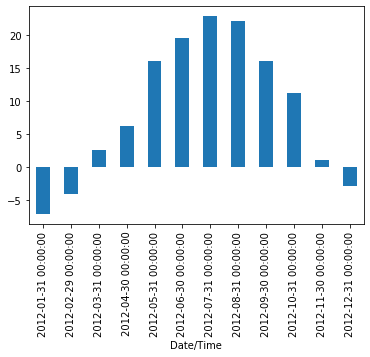

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline

tmp.plot(kind='bar')

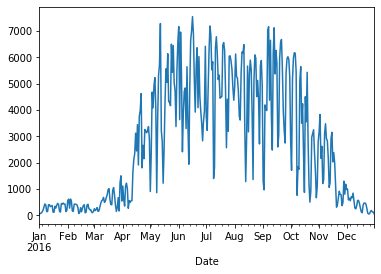

In [55]:
bikes['Berri1'].plot()

<AxesSubplot:>

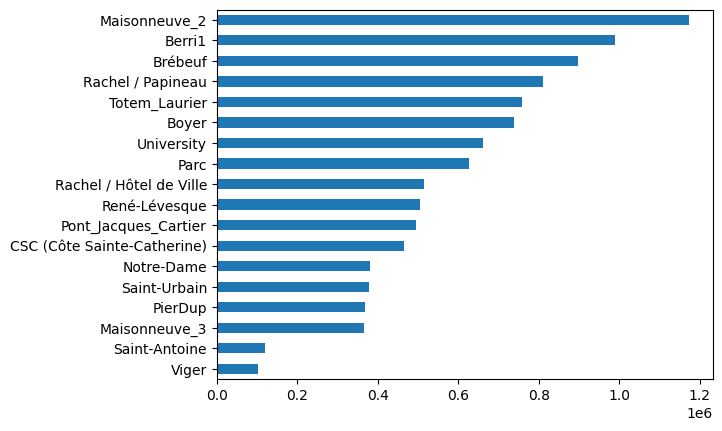

In [229]:
bikes.drop(columns="Timestamp").sum().sort_values(ascending=True).plot(kind="barh")

In [23]:
bikes.sum()

Timestamp                      00:0000:0000:0000:0000:0000:0000:0000:0000:000...
Berri1                                                                    988595
Boyer                                                                     737419
Brébeuf                                                                   896210
CSC (Côte Sainte-Catherine)                                               465906
Maisonneuve_2                                                        1.17334e+06
Maisonneuve_3                                                             365220
Notre-Dame                                                                380477
Parc                                                                      627132
PierDup                                                                   367346
Pont_Jacques_Cartier                                                      494156
Rachel / Hôtel de Ville                                                   515635
Rachel / Papineau           

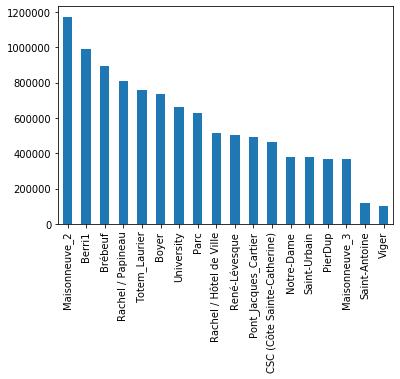

In [32]:
(bikes.drop(columns='Timestamp')
      .sum()
      .sort_values(ascending=False)
      .plot(kind='bar'));

<AxesSubplot:xlabel='Date'>

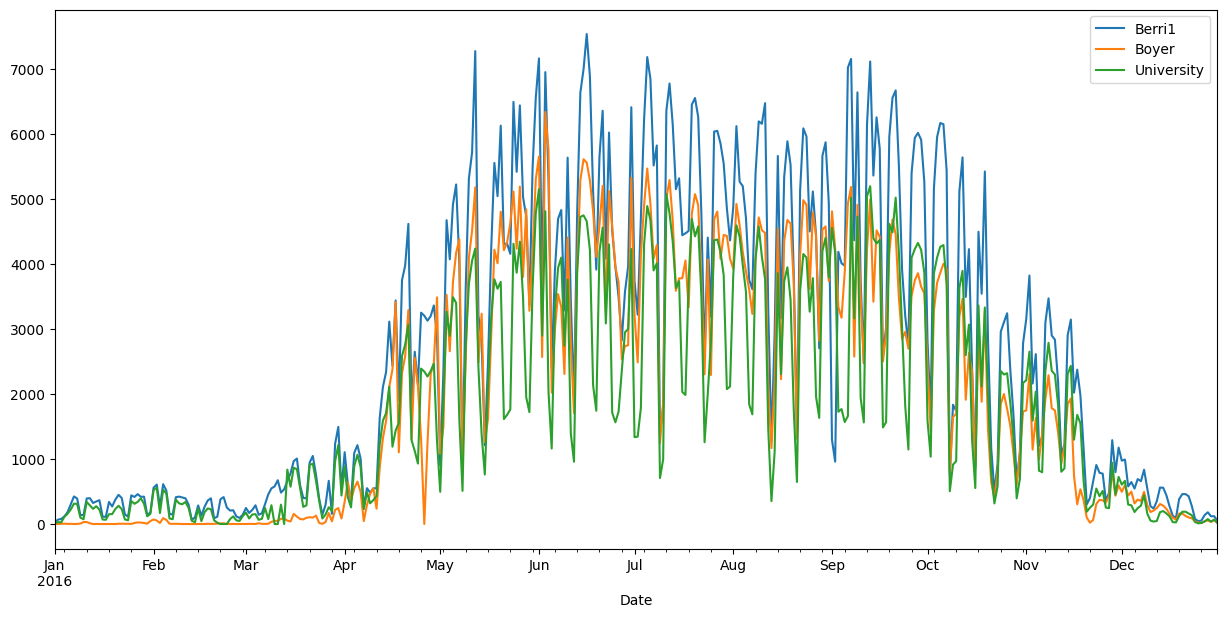

In [234]:
cols = ["Berri1", "Boyer", "University"]
bikes[cols].plot(figsize=(15, 7))

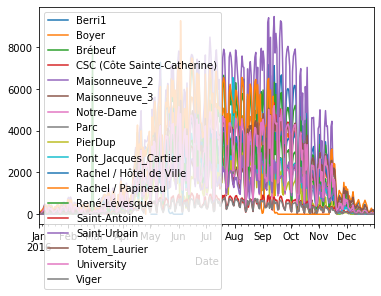

In [33]:
bikes.plot()

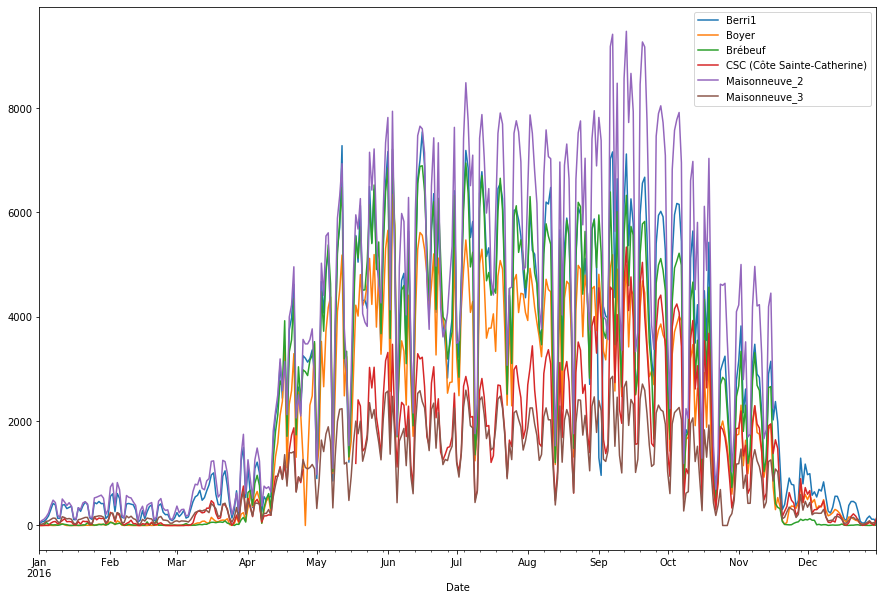

In [58]:
bikes.iloc[:, :7].plot(figsize=(15, 10))

Datos con las llamadas al 311 en la ciudad de Nueva York durante el 2011

Fuente: https://data.cityofnewyork.us/dataset/311-Service-Requests-From-2011/fpz8-jqf4

In [35]:
data = pd.read_csv('../data/NYC-311-SR-CB09-4714.csv')
data

/home/alberto/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (17,29,30,32,33,34,35) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
0,46377972,06/03/2020 07:15:06 PM,NaN,HPD,Department of Housing Preservation and Develop...,PLUMBING,BATHTUB/SHOWER,RESIDENTIAL BUILDING,10027.0,3139 BROADWAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.813847,-73.959651,"(40.81384679464595, -73.95965063190523)"
1,46376857,06/03/2020 11:17:50 PM,06/03/2020 11:34:11 PM,NYPD,New York City Police Department,Noise - Residential,Loud Talking,NaN,10027.0,192 CLAREMONT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.814950,-73.960123,"(40.81495033685791, -73.96012322412237)"
2,46377601,06/03/2020 11:59:09 PM,06/04/2020 12:12:52 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,10031.0,620 WEST 141 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.824162,-73.952978,"(40.82416166479311, -73.95297805704422)"
3,46376657,06/03/2020 03:53:39 PM,06/03/2020 04:48:05 PM,NYPD,New York City Police Department,Noise - Residential,Loud Talking,Residential Building/House,10027.0,1470 AMSTERDAM AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.817344,-73.953384,"(40.817343949772905, -73.95338389635391)"
4,46376662,06/03/2020 03:49:10 PM,06/03/2020 04:04:18 PM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10031.0,481 WEST 145 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.825013,-73.947055,"(40.82501270441526, -73.94705537488909)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223426,44063197,10/15/2019 09:53:04 PM,10/16/2019 01:06:50 AM,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,10027.0,3149 BROADWAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.814247,-73.959354,"(40.81424741977982, -73.95935415225733)"
223427,44063201,10/15/2019 10:08:08 PM,10/15/2019 10:59:00 PM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10027.0,525 WEST 133 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.817997,-73.954128,"(40.817997491323844, -73.95412768505584)"
223428,44063202,10/15/2019 09:06:24 PM,10/15/2019 11:20:54 PM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10027.0,525 WEST 133 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.817997,-73.954128,"(40.817997491323844, -73.95412768505584)"
223429,44063207,10/15/2019 10:27:19 AM,10/15/2019 11:47:41 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Store/Commercial,10031.0,3418 BROADWAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.821958,-73.953225,"(40.82195775753952, -73.95322530259935)"


In [36]:
data['Complaint Type'].unique().size

197

In [37]:
count = data['Complaint Type'].value_counts()
count

HEAT/HOT WATER                   37193
Noise - Residential              34161
Noise - Street/Sidewalk          20182
PAINT/PLASTER                    10973
UNSANITARY CONDITION             10767
                                 ...  
Overflowing Recycling Baskets        1
Advocate-Prop Refunds/Credits        1
Advocate - Other                     1
VACANT APARTMENT                     1
AGENCY                               1
Name: Complaint Type, Length: 197, dtype: int64

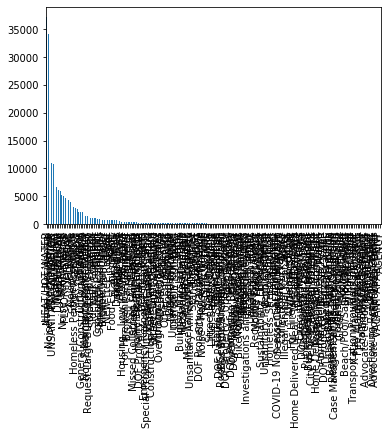

In [39]:
count.plot(kind='bar')

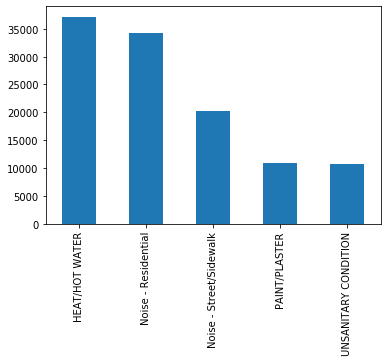

In [41]:
count[count > 10000].plot(kind='bar')

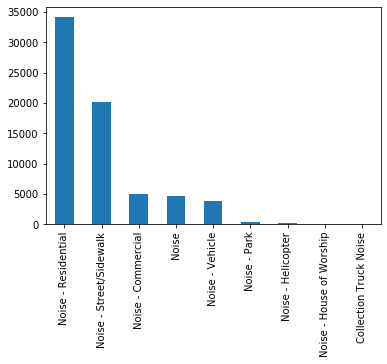

In [68]:
count[ count.index.str.contains("Noise") ].plot(kind="bar")

##### Ejercicio weather y nycity

##### Group by: split-apply-combine

Muchas veces las operaciones no las queremos hacer sobre una variable sino agrupandola en función de otra. Pandas implementa esta funcionalidad en los métodos `.groupby()`, `.transform()` y `.aggregate()`.

Más información: https://pandas.pydata.org/pandas-docs/stable/groupby.html

In [69]:
bikes['Month'] = bikes.index.month
bikes['Trimestre'] = pd.cut(bikes['Month'], [1, 3, 6, 9, 12], include_lowest=True)
bikes.groupby('Trimestre')['University'].mean()

Trimestre
(0.999, 3.0]     258.373626
(3.0, 6.0]      2466.109890
(6.0, 9.0]      3293.293478
(9.0, 12.0]     1190.315217
Name: University, dtype: float64

In [70]:
import numpy as np
res = bikes.groupby('Month').agg([np.sum, np.mean])
res

Berri1                Boyer              Brébeuf               \
          sum         mean     sum         mean     sum         mean   
Month                                                                  
1        8503   274.290323     244     7.870968     473    15.258065   
2        8432   290.758621     348    12.000000     624    21.517241   
3       17294   557.870968    2069    66.741935    1164    37.548387   
4       62759  2091.966667   42450  1415.000000   59473  1982.433333   
5      136001  4387.129032  112103  3616.225806  136906  4416.322581   
6      145972  4865.733333  121958  4065.266667  144407  4813.566667   
7      156673  5053.967742  123951  3998.419355  151517  4887.645161   
8      146558  4727.677419  119706  3861.483871  143398  4625.741935   
9      145296  4843.200000  113692  3789.733333  136479  4549.300000   
10      96285  3105.967742   64263  2073.000000   84387  2722.161290   
11      52637  1754.566667   30053  1001.766667   36713  1223.766667   
12      12185   393.064516    6582   212.322581     669    21.580645   

      CSC (Côte Sainte-Catherine)              Maisonneuve_2               \
                              sum         mean           sum         mean   
Month                                                                       
1                          1955.0    63.064516       10244.0   330.451613   
2                          1618.0    55.793103       11079.0   382.034483   
3                          6450.0   208.064516       21983.0   709.129032   
4                         18297.0   731.880000       67934.0  2264.466667   
5                         30060.0  2147.142857      146900.0  4738.709677   
6                         63753.0  2125.100000      163284.0  5442.800000   
7                         61741.0  1991.645161      183623.0  5923.322581   
8                         77663.0  2505.258065      182923.0  5900.741935   
9                        101796.0  3393.200000      202139.0  6737.966667   
10                        64486.0  2080.193548      128940.0  4159.354839   
11                        32725.0  1090.833333       54293.0  3393.312500   
12                         5362.0   172.967742           0.0          NaN   

       ... Saint-Antoine             Saint-Urbain              Totem_Laurier  \
       ...           sum        mean          sum         mean           sum   
Month  ...                                                                     
1      ...          1084   34.967742         2555    82.419355          5817   
2      ...          1296   44.689655         2573    88.724138          3803   
3      ...          1839   59.322581         8916   287.612903         11238   
4      ...          6955  231.833333        29079   969.300000         48890   
5      ...         16256  524.387097        52932  1707.483871         98680   
6      ...         18441  614.700000        56848  1894.933333        110439   
7      ...         19823  639.451613        52653  1698.483871        112032   
8      ...         17687  570.548387        51068  1647.354839        112876   
9      ...         17765  592.166667        55635  1854.500000        115794   
10     ...         10596  341.806452        39899  1287.064516         78427   
11     ...          6031  201.033333        22592   753.066667         49386   
12     ...          1545   49.838710         3408   109.935484         11960   

                   University               Viger              
              mean        sum         mean    sum        mean  
Month                                                          
1       187.645161       6012   193.935484   1258   40.580645  
2       131.137931       5490   189.310345   1246   42.965517  
3       362.516129      12010   387.419355   1807   58.290323  
4      1629.666667      41917  1397.233333   6105  203.500000  
5      3183.225806      86415  2787.580645  13288  428.645161  
6      3681.300000      96084  3202.800000  14966  498.86

In [71]:
res.loc[:, ("Berri1", "sum")]

Month
1       8503
2       8432
3      17294
4      62759
5     136001
6     145972
7     156673
8     146558
9     145296
10     96285
11     52637
12     12185
Name: (Berri1, sum), dtype: int64

In [72]:
bikes.reset_index().groupby('Month').agg({'Berri1': [np.mean, np.sum], 'Boyer': np.sum})

Berri1           Boyer
              mean     sum     sum
Month                             
1       274.290323    8503     244
2       290.758621    8432     348
3       557.870968   17294    2069
4      2091.966667   62759   42450
5      4387.129032  136001  112103
6      4865.733333  145972  121958
7      5053.967742  156673  123951
8      4727.677419  146558  119706
9      4843.200000  145296  113692
10     3105.967742   96285   64263
11     1754.566667   52637   30053
12      393.064516   12185    6582

In [73]:

df1 = bikes.groupby('Month').agg({'Berri1': np.mean, 'Boyer': np.sum})
df1 = bikes.groupby('Month').aggregate([np.sum, np.mean])
df1 = bikes.groupby(['Month'])[['Berri1', 'University']].sum()
df1

,Berri1,University
Month,,
1,8503,6012
2,8432,5490
3,17294,12010
4,62759,41917
5,136001,86415
6,145972,96084
7,156673,101593
8,146558,98018
9,145296,103372


In [74]:
bikes['Month'] = bikes.index.month

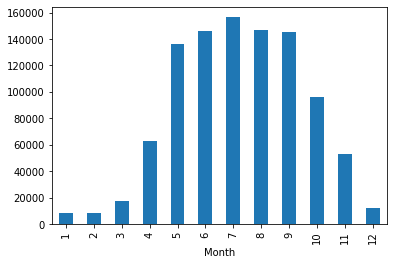

In [75]:
df1['Berri1'].plot(kind='bar');

###### Ejercicio bicis

##### Combinar Pandas y Matplotlib

El método `.plot()` de los `DataFrames` de Pandas es bastante flexible, pero no podemos modificar ningún aspecto del gráfico no contemplado en los parámetros opcionales:

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html

En ese caso, puesto que los gráficos de Pandas están construídos sobre la librería Matplotlib, podemos utilizar las funciones de bajo nivel de la misma para modificar cualquier aspecto de nuestro gráfico.

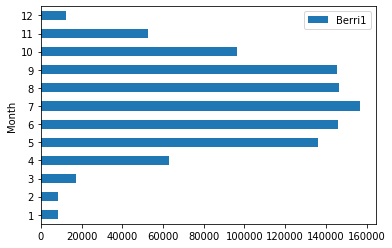

In [76]:
fig, ax = plt.subplots()
df1.plot(kind='barh', y='Berri1', ax=ax)

Text(0, 0.5, 'Mes')

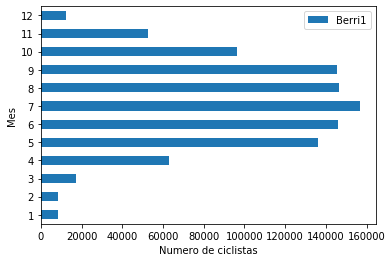

In [77]:
fig, ax = plt.subplots()
df1.plot(kind='barh', y='Berri1', ax=ax)
ax.set_xlabel('Numero de ciclistas')
ax.set_ylabel('Mes')

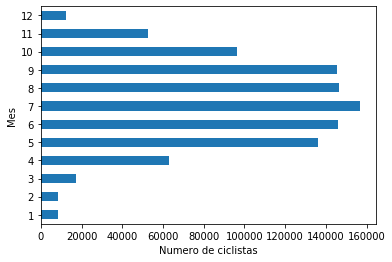

In [78]:
fig, ax = plt.subplots()
df1.plot(kind='barh', y='Berri1', ax=ax)
ax.set_xlabel('Numero de ciclistas')
ax.set_ylabel('Mes')
ax.legend().set_visible(False)

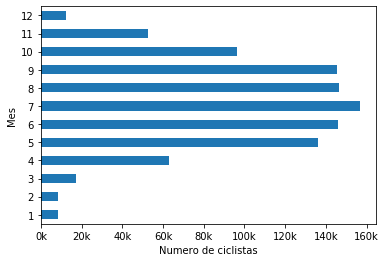

In [79]:
from matplotlib.ticker import FuncFormatter
fig, ax = plt.subplots()
df1.plot(kind='barh', y='Berri1', ax=ax)
ax.set_xlabel('Numero de ciclistas')
ax.set_ylabel('Mes')

ax.xaxis.set_major_formatter(FuncFormatter(lambda x, y: '{:d}k'.format(int(x/1000))))

ax.legend().set_visible(False)

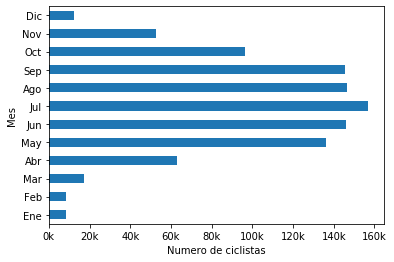

In [80]:
from matplotlib.ticker import FuncFormatter
fig, ax = plt.subplots()
df1.plot(kind='barh', y='Berri1', ax=ax)
ax.set_xlabel('Numero de ciclistas')
ax.set_ylabel('Mes')
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, y: '{:d}k'.format(int(x/1000))))
ax.set_yticklabels(['Ene','Feb','Mar','Abr','May','Jun','Jul','Ago','Sep','Oct','Nov','Dic'])
ax.legend().set_visible(False)

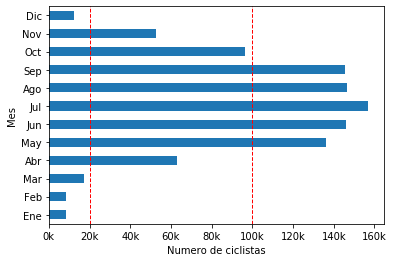

In [81]:
from matplotlib.ticker import FuncFormatter
fig, ax = plt.subplots()
df1.plot(kind='barh', y='Berri1', ax=ax)
ax.set_xlabel('Numero de ciclistas')
ax.set_ylabel('Mes')
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, y: '{:d}k'.format(int(x/1000))))
ax.set_yticklabels(['Ene','Feb','Mar','Abr','May','Jun','Jul','Ago','Sep','Oct','Nov','Dic'])
for x in (20000, 100000):
    ax.axvline(x=x, color='r', linestyle='--', linewidth=1)
ax.legend().set_visible(False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcef0d0fad0>,
      dtype=object)

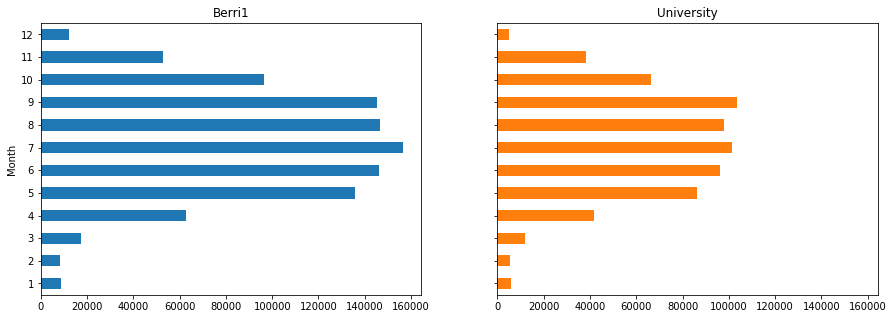

In [82]:
# solo con Pandas
df1[['Berri1', 'University']].plot(kind='barh', 
                                   sharey=True, 
                                   subplots=True, 
                                   legend=False, 
                                   layout=(1,2),
                                   figsize=(15, 5))

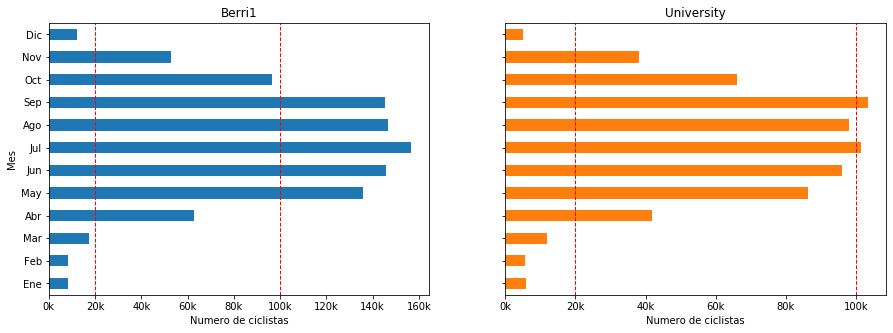

In [83]:
# Pandas + retocar en Matplotlib
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
df1[['Berri1', 'University']].plot(kind='barh',  
                                   subplots=True, 
                                   legend=False, 
                                   ax=axes)
for ax in axes:
    ax.set_xlabel('Numero de ciclistas')
    ax.set_ylabel('Mes')
    ax.xaxis.set_major_formatter(FuncFormatter(lambda x, y: '{:d}k'.format(int(x/1000))))
    ax.set_yticklabels(['Ene','Feb','Mar','Abr','May','Jun','Jul','Ago','Sep','Oct','Nov','Dic'])
    for x in (20000, 100000):
        ax.axvline(x=x, color='r', linestyle='--', linewidth=1)

In [84]:
df.to_csv("numeros.csv")

In [85]:
df

,A,B,C,D,F
2017-01-01,-0.637673,-0.127584,-1.144486,-0.854452,NaN
2017-01-02,-0.513089,-0.109069,1.542913,-0.825571,1.0
2017-01-03,0.607591,-0.199361,-0.328072,-0.561886,2.0
2017-01-04,0.744946,0.104076,0.114213,0.499643,3.0
2017-01-05,-1.279198,-0.438748,1.746576,-0.132656,4.0
2017-01-06,2.127270,-0.098197,-1.499132,-1.884918,5.0
